In [34]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
from tensorflow.keras import Sequential
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

In [31]:
IMG_WIDTH, IMG_HEIGHT = 224, 224

In [32]:
def add_prediction_to_image(image_path, model, class_names):
    """Добавление предсказания к изображению"""
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)[0][0]

    class_idx = 1 if prediction > 0.5 else 0
    label = class_names[class_idx]
    probability = prediction if prediction > 0.5 else 1 - prediction

    pil_img = Image.fromarray(np.uint8(img))
    draw = ImageDraw.Draw(pil_img)

    text = f"{label}: {probability * 100:.2f}%"

    try:
        font = ImageFont.load_default()
        text_width, text_height = draw.textsize(text, font=font)
        draw.rectangle([(10, 10), (20 + text_width, 20 + text_height)], fill=(255, 255, 255, 180))
        draw.text((15, 15), text, fill=(0, 0, 0), font=font)
    except AttributeError:
        draw.rectangle([(10, 10), (200, 40)], fill=(255, 255, 255, 180))
        draw.text((15, 15), text, fill=(0, 0, 0))

    return pil_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


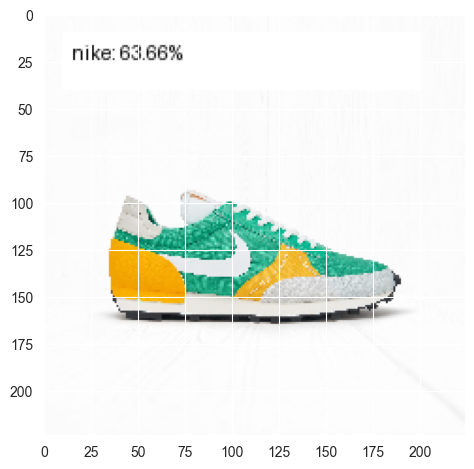

In [43]:
model_path = 'shoe_classifier_model_best.keras'
image_path = 'images/31744f25887aea550f679ab39439b9a2.jpg'
model = tf.keras.models.load_model(model_path)
plt.imshow(add_prediction_to_image(image_path, model, ['adidas', 'nike']))
plt.tight_layout()
plt.show()